In [1]:
from fastai.vision import *


In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
data = ImageDataBunch.from_folder(r'D:\Efim\thesis\fastai', test='signal_mel')

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.185743,0.086457,0.969524,03:19
1,0.062835,0.036943,0.986667,02:22
2,0.027569,0.026918,0.988571,01:29


In [6]:
interp = ClassificationInterpretation.from_learner(learn)

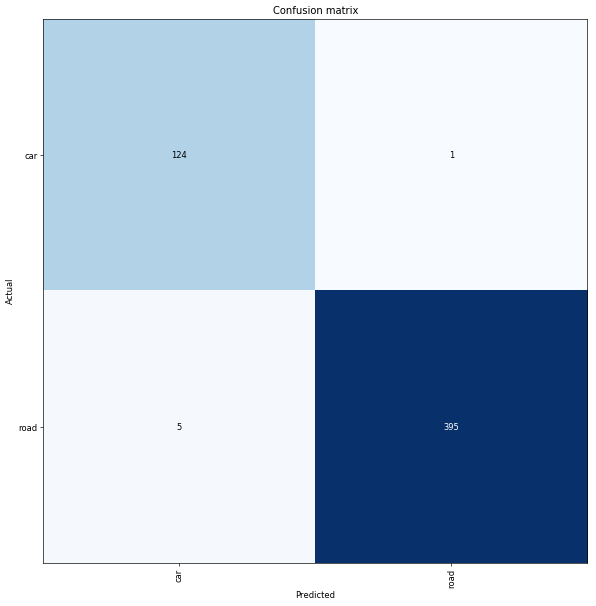

In [7]:
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [8]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.003087,0.003326,0.998095,01:53
1,0.001136,0.002268,0.998095,01:51
2,0.000586,0.001185,1.000000,01:54


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

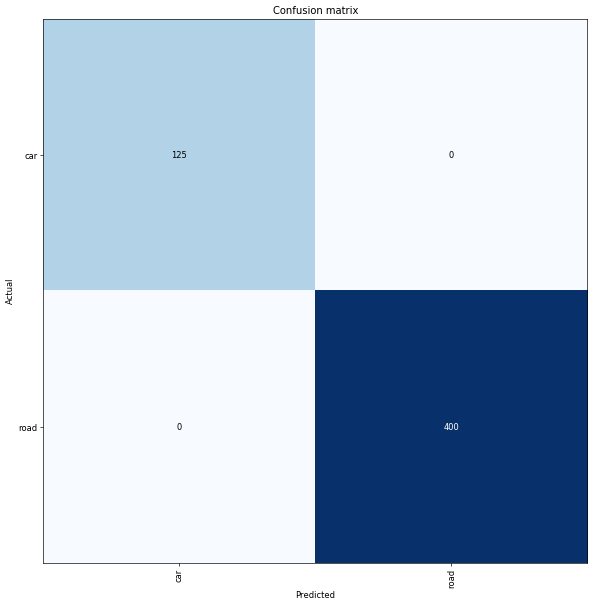

In [10]:
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [11]:
learn.save('fastai_audio_params_1')

In [12]:
learn.export('fastai_audio_model_1.pkl')

In [9]:
#learn = load_learner(path=r'D:\Efim\thesis',file=r'fastai_audio_model.pkl')

In [13]:
preds,y = learn.get_preds(DatasetType.Test)


In [14]:
np.save(r'D:\Efim\thesis\fastai\items_test_ds.npy', data.test_ds.items)

In [2]:
torch.save(preds, r'D:\Efim\thesis\fastai\preds.pt')

NameError: name 'preds' is not defined

In [17]:
np.argmax(preds, axis=1)

tensor([0, 0, 0,  ..., 0, 0, 0])

In [19]:
pred_names = dict(zip(data.test_ds.items,np.argmax(preds, axis=1)))

In [22]:
type(data.test_ds.items[0])

pathlib.WindowsPath

In [23]:
import csv

In [24]:
w = csv.writer(open(r'D:\Efim\thesis\fastai\output.csv', "w"))
for key, val in pred_names.items():
    w.writerow([key, val])

In [25]:
import cv2

In [42]:
img = cv2.imread(data.test_ds.items[0].as_posix())

KeyboardInterrupt: 

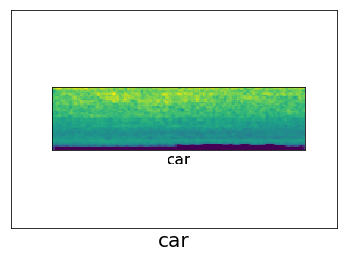

In [58]:
import matplotlib.pyplot as plt
class_names = {0:'car', 1:'no car'}
i = 0
for k,v in pred_names.items():
    print(i)
    i = i+1
    img = cv2.imread(k.as_posix())
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = v.item()

    plt.xlabel("{}".format(class_names[predicted_label]), fontsize=20)
    plt.savefig(k.as_posix())
    plt.close()

In [55]:
predicted_label.item()

0